[![Dataflowr](https://raw.githubusercontent.com/dataflowr/website/master/_assets/dataflowr_logo.png)](https://dataflowr.github.io/website/)

Code adapted from [Optimization chapter](http://www.d2l.ai/chapter_optimization/) of Dive into Deep Learning

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

def show_trace_2d(f, res , color = 'red'):
    """Show the trace of 2d variables during optimization."""
    x1, x2 = zip(*res)
    plt.plot(x1, x2, '-o', color=color)
    x1 = np.arange(-5.5, 3.5, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')

In [2]:
def train_2d(trainer):
    """Optimize the objective function of 2d variables with a customized trainer."""
    """trainer(x1,x2,s_x1,s_x2) should return the updated positions x1, x2 and possible memory terms."""
    x1, x2 = -5, -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    for i in range(20):
        x1, x2, s_x1, s_x2 = trainer(x1, x2, s_x1, s_x2)
        res.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
    return res

# Gradient descent

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=589)

In [3]:
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

In [ ]:
show_trace_2d(f_2d, train_2d(gd_2d))

In [ ]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

# Momemtum

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=734)

In [13]:
eta, gamma = 0.4, 0.5

def momentum_2d(x1, x2, v1, v2):
    v1 = 0.2 * x1*eta + v1 * (gamma)# your code
    v2 = 4 * x2*eta+ v2 * (gamma)# your code
    return x1 - v1, x2 - v2, v1, v2

epoch 20, x1 -0.062843, x2 0.001202


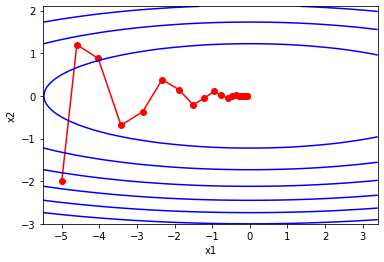

In [14]:
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


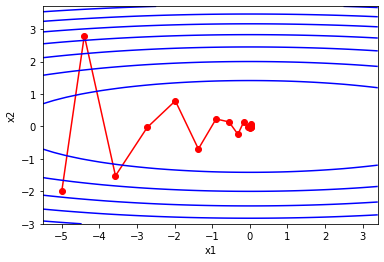

In [15]:
eta = 0.6
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 -0.589111, x2 0.698505


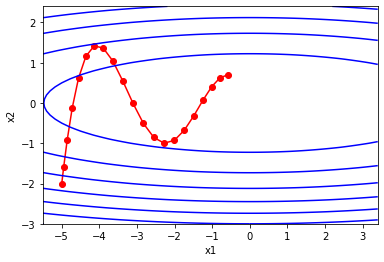

In [16]:
eta, gamma = 0.05, 0.9
show_trace_2d(f_2d, train_2d(momentum_2d))

# Nesterov accelerated gradient

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=938)

In [20]:
eta, gamma = 0.05, 0.9

def Nesterov_2d(x1, x2, v1, v2):
    v1 = 0.2 * (x1-v1*gamma)*eta + v1 * (gamma)# your code
    v2 = 4 * (x2-v2*gamma)*eta+ v2 * (gamma)# your code
    return x1 - v1, x2 - v2, v1, v2

epoch 20, x1 -0.751356, x2 0.071637
epoch 20, x1 -0.589111, x2 0.698505


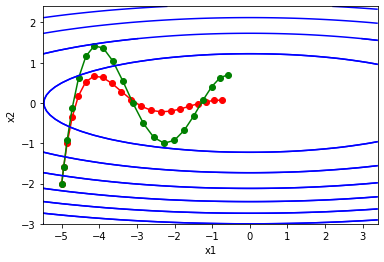

In [21]:
show_trace_2d(f_2d, train_2d(Nesterov_2d))
show_trace_2d(f_2d, train_2d(momentum_2d), color= 'green')

# Adagrad

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=1080)

In [22]:
import math

def adagrad_2d(x1, x2, s1, s2):
    # The first two terms are the independent variable gradients
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    #
    # your code here (hint: use math.sqrt)
    #
    s1 += g1*g1
    s2 += g2*g2
    v1 = eta * g1 /(math.sqrt(s1)+eps)
    v2 = eta * g2 /(math.sqrt(s2)+eps)
    return x1-v1, x2-v2, s1, s2

epoch 20, x1 -2.382564, x2 -0.158591


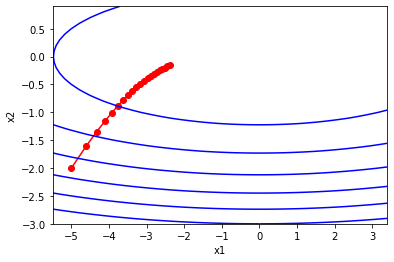

In [23]:
eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


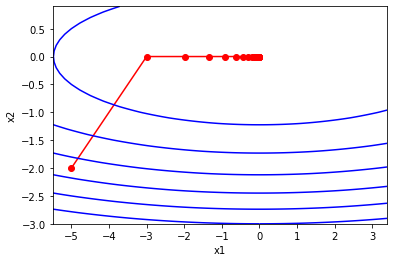

In [24]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

# RMSProp

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=1206)

In [25]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    #
    # your code here
    #
    s1 = s1*gamma + (1-gamma)*g1*g1
    s2 = s2*gamma + (1-gamma)*g2*g2
    v1 = eta * g1 /(math.sqrt(s1)+eps)
    v2 = eta * g2 /(math.sqrt(s2)+eps)
    
    return x1-v1, x2-v2, s1, s2

epoch 20, x1 -0.010598, x2 0.000000


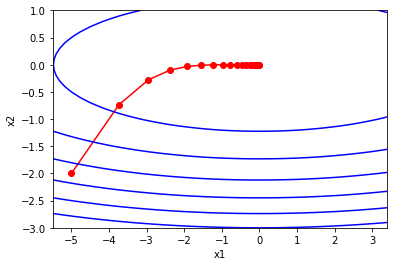

In [26]:
eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))

# Adam

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=1331)

In [33]:
def adam_2d(x1, x2, s1, s2 , t):
    beta1, beta2, eps = 0.9, 0.99, 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    #
    # your code here
    #
    # 0: momenta
    s1[0] = beta1*s1[0] + (1-beta1)*g1
    s2[0] = beta1*s2[0] + (1-beta1)*g2
    # 1: variace
    s1[1] = beta1*s1[1] + (1-beta2)*g1*g1
    s2[1] = beta1*s2[1] + (1-beta2)*g2*g2
    
    t = t+1
    v1 = eta*s1[0] / (1-beta1**t) / (math.sqrt(s1[1]/(1-beta2**t)) + eps) 
    v2 = eta*s2[0] / (1-beta1**t) / (math.sqrt(s2[1]/(1-beta2**t)) + eps) 
    return x1-v1, x2-v2, s1, s2

In [31]:
import numpy as np
def train_adam_2d(trainer):
    """Optimize the objective function of 2d variables with Adam-li trainer."""
    """trainer(x1,x2,s_x1,s_x2) should return the updated positions x1, x2 and possible memory terms."""
    x1, x2 = -5, -2
    s_x1, s_x2 = [0, 0, 0], [0, 0, 0]
    res = [(x1, x2)]
    for i in range(20):
        x1, x2, s_x1, s_x2 = trainer(x1, x2, s_x1, s_x2, i)
        res.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
    return res

epoch 20, x1 -0.734990, x2 0.593310


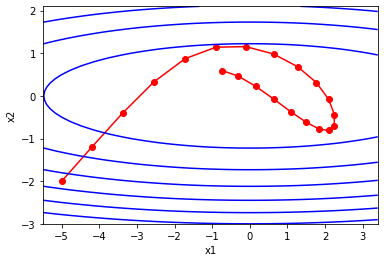

In [34]:
eta = 0.8
show_trace_2d(f_2d, train_adam_2d(adam_2d))

# AMSGrad

[Video timestamp](https://youtu.be/UvM0hK4E2dc?t=1479)

In [37]:
def amsgrad_2d(x1, x2, s1, s2 , t):
    beta1, beta2, eps = 0.9, 0.99, 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    #
    # your code here
    #
    # 0: momenta
    s1[0] = beta1*s1[0] + (1-beta1)*g1
    s2[0] = beta1*s2[0] + (1-beta1)*g2
    # 1: variace
    s1[1] = max(s1[1], beta1*s1[1] + (1-beta2)*g1*g1)
    s2[1] = max(s2[1], beta1*s2[1] + (1-beta2)*g2*g2)
    
    # t = t+1
    # v1 = eta*s1[0] / (1-beta1**t) / (math.sqrt(s1[1]/(1-beta2**t)) + eps) 
    v1 = eta*s1[0] / (1) / (math.sqrt(s1[1]/(1)) + eps) 
    # v2 = eta*s2[0] / (1-beta1**t) / (math.sqrt(s2[1]/(1-beta2**t)) + eps) 
    v2 = eta*s2[0] / (1) / (math.sqrt(s2[1]/(1)) + eps) 
    
    return x1-v1, x2-v2, s1, s2

epoch 20, x1 -0.129118, x2 -0.680222
epoch 20, x1 -1.529746, x2 0.408747


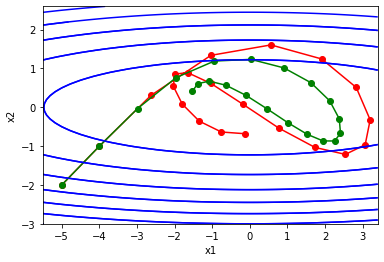

In [38]:
eta = 1
show_trace_2d(f_2d, train_adam_2d(amsgrad_2d))
show_trace_2d(f_2d, train_adam_2d(adam_2d), color ='green')

[![Dataflowr](https://raw.githubusercontent.com/dataflowr/website/master/_assets/dataflowr_logo.png)](https://dataflowr.github.io/website/)